# Import all required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the Training and Testing csv file

In [2]:
training_data = pd.read_csv('twitter_x_y_train.csv')
testing_data = pd.read_csv('twitter_x_test.csv')

# Shape of Traning and Testing data

In [3]:
print(training_data.shape)
print(testing_data.shape)

(10980, 12)
(3660, 11)


# Look the first 5 records of training_data

In [4]:
training_data.tail(5)

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
10975,569934458364813313,neutral,American,NaN,Cottopanama85,NaN,0,@AmericanAir followback,NaN,2015-02-23 10:58:58 -0800,"ohio,panama",NaN
10976,568564006329434113,positive,United,NaN,PaulBEsteves,NaN,0,@united thanks for the help. Wish the phone re...,NaN,2015-02-19 16:13:17 -0800,Brooklyn,Eastern Time (US & Canada)
10977,569643648910028801,negative,US Airways,NaN,runfixsteve,NaN,0,@usairways the. Worst. Ever. #dca #customerser...,NaN,2015-02-22 15:43:24 -0800,"St. Augustine, Florida",NaN
10978,568864981917110272,negative,US Airways,NaN,CLChicosky,NaN,0,@nrhodes85: look! Another apology. DO NOT FLY ...,NaN,2015-02-20 12:09:15 -0800,NaN,NaN
10979,568929299350179840,negative,United,NaN,JW_Blocker,NaN,1,@united you are by far the worst airline. 4 pl...,NaN,2015-02-20 16:24:49 -0800,NaN,NaN


In [5]:
# Looks at first 5 rows of testing data

In [6]:
testing_data.head(5)

,tweet_id,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569682010270101504,American,NaN,zsalim03,NaN,0,@AmericanAir In car gng to DFW. Pulled over 1h...,NaN,2015-02-22 18:15:50 -0800,Texas,Central Time (US & Canada)
1,569608307184242688,American,NaN,sa_craig,NaN,0,"@AmericanAir after all, the plane didn’t land ...",NaN,2015-02-22 13:22:57 -0800,"College Station, TX",Central Time (US & Canada)
2,567879304593408001,Southwest,NaN,DanaChristos,NaN,1,@SouthwestAir can't believe how many paying cu...,NaN,2015-02-17 18:52:31 -0800,CT,Eastern Time (US & Canada)
3,569757651539660801,US Airways,NaN,rossj987,NaN,0,@USAirways I can legitimately say that I would...,NaN,2015-02-22 23:16:24 -0800,"Washington, D.C.",Eastern Time (US & Canada)
4,569900705852608513,American,NaN,tranpham18,NaN,0,@AmericanAir still no response from AA. great ...,NaN,2015-02-23 08:44:51 -0800,New York City,Eastern Time (US & Canada)


# Column Names

In [7]:
training_data.columns

Index(['tweet_id', 'airline_sentiment', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

# Check NAN values in training data

In [8]:
training_data.isna().sum()

tweet_id                      0
airline_sentiment             0
airline                       0
airline_sentiment_gold    10949
name                          0
negativereason_gold       10956
retweet_count                 0
text                          0
tweet_coord               10204
tweet_created                 0
tweet_location             3550
user_timezone              3577
dtype: int64

# Check NAN values in testing data

In [9]:
testing_data.isna().sum()

tweet_id                     0
airline                      0
airline_sentiment_gold    3651
name                         0
negativereason_gold       3652
retweet_count                0
text                         0
tweet_coord               3417
tweet_created                0
tweet_location            1183
user_timezone             1243
dtype: int64

# Delete the Non-useful Columns from both training and testing data

In [10]:
del training_data['tweet_id']
del training_data['airline_sentiment_gold']
del training_data['name']
del training_data['negativereason_gold']
del training_data['retweet_count']
del training_data['tweet_coord']
del training_data['tweet_created']
del training_data['tweet_location']
del training_data['user_timezone']

del testing_data['tweet_id']
del testing_data['airline_sentiment_gold']
del testing_data['name']
del testing_data['negativereason_gold']
del testing_data['retweet_count']
del testing_data['tweet_coord']
del testing_data['tweet_created']
del testing_data['tweet_location']
del testing_data['user_timezone']

In [11]:
training_data.head()

,airline_sentiment,airline,text
0,negative,Southwest,"@SouthwestAir I am scheduled for the morning, ..."
1,positive,Southwest,@SouthwestAir seeing your workers time in and ...
2,positive,United,@united Flew ORD to Miami and back and had gr...
3,negative,Southwest,@SouthwestAir @dultch97 that's horse radish 😤🐴
4,negative,United,@united so our flight into ORD was delayed bec...


# Number of Tweets Per airline

In [12]:
training_data['airline'].value_counts()

United            2928
US Airways        2152
American          2078
Southwest         1817
Delta             1639
Virgin America     366
Name: airline, dtype: int64

# Plot the Pie - Graph to visualize the Number of Tweets per Airline

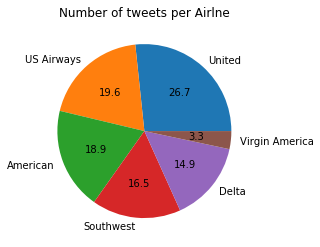

In [13]:
plt.title("Number of tweets per Airlne")
labels = ['United','US Airways','American','Southwest','Delta','Virgin America']
sizes = [2928,2152,2078,1817,1639,366]
plt.pie(sizes,labels=labels,autopct='%.1f')
plt.show()

In [14]:
training_data['airline_sentiment'].value_counts()

negative    6851
neutral     2327
positive    1802
Name: airline_sentiment, dtype: int64

# Plot the Graph to visualize the airline_sentiments

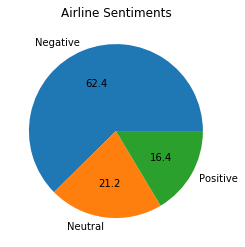

In [15]:
plt.title("Airline Sentiments")
labels = ['Negative','Neutral','Positive']
sizes = [6851,2327,1802]
plt.pie(sizes,labels=labels,autopct='%.1f')
plt.show()

# Only Text and Airline sentiments are required from the above Training Data
# Fetch them and convert into Numpy array

In [16]:
x_train = training_data['text']
x_test = testing_data['text']
print(len(x_train))
print(len(x_test))

10980
3660


In [17]:
y_train = training_data['airline_sentiment']
len(y_train)

10980

In [18]:
x_train = np.array(x_train)
print(x_train.shape)

x_train = x_train.reshape(len(x_train),1)
print(x_train.shape)

y_train = np.array(y_train)
print(y_train.shape)

y_train = y_train.reshape(len(y_train),1)
print(y_train.shape)

(10980,)
(10980, 1)
(10980,)
(10980, 1)


In [19]:
x_test = np.array(x_test)
print(x_test.shape)

x_test = x_test.reshape(len(x_test),1)
print(x_test.shape)

(3660,)
(3660, 1)


In [20]:
x_y_train = np.append(x_train,y_train,axis=1)
print(x_y_train.shape)
x_y_train

(10980, 2)


array([['@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
        'negative'],
       ['@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
        'positive'],
       ['@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
        'positive'],
       ...,
       ['@usairways the. Worst. Ever. #dca #customerservice', 'negative'],
       ['@nrhodes85: look! Another apology. DO NOT FLY @USAirways',
        'negative'],
       ['@united you are by far the worst airline. 4 plane delays on 1 round trip flight. How is that possible.',
        'negative']], dtype=object)

In [21]:
x_test

array([["@AmericanAir In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can't reach arpt for AA2450. Wat 2 do?"],
       ['@AmericanAir after all, the plane didn’t land in identical or worse) conditions at GRK according to METARs.'],
       ["@SouthwestAir can't believe how many paying customers you left high and dry with no reason for flight Cancelled Flightlations Monday out of BDL! Wow."],
       ...,
       ['Nice RT @VirginAmerica: The man of steel might be faster, but we have WiFi – just saying. #ScienceBehindTheExperience http://t.co/FGRbpAZSiX'],
       ['@AmericanAir Aww Thanks AA..DFW was on GMA up here this AM..so i understand ..Btw A.A is my Airline when im able to trv..Love you guys.:)'],
       ['@united the lounge tells us they have no pillows for my grandma as one of the ladies opens the closet and I see 2 right there. #unitedlies']],
      dtype=object)

# Create array of words for both Training and Testing tweets

In [22]:
from nltk import word_tokenize
training_tweet = []
for text,category in x_y_train:
    training_tweet.append((word_tokenize(text),category))

training_tweet[0:5]

[(['@',
   'SouthwestAir',
   'I',
   'am',
   'scheduled',
   'for',
   'the',
   'morning',
   ',',
   '2',
   'days',
   'after',
   'the',
   'fact',
   ',',
   'yes..not',
   'sure',
   'why',
   'my',
   'evening',
   'flight',
   'was',
   'the',
   'only',
   'one',
   'Cancelled',
   'Flightled'],
  'negative'),
 (['@',
   'SouthwestAir',
   'seeing',
   'your',
   'workers',
   'time',
   'in',
   'and',
   'time',
   'out',
   'going',
   'above',
   'and',
   'beyond',
   'is',
   'why',
   'I',
   'love',
   'flying',
   'with',
   'you',
   'guys',
   '.',
   'Thank',
   'you',
   '!'],
  'positive'),
 (['@',
   'united',
   'Flew',
   'ORD',
   'to',
   'Miami',
   'and',
   'back',
   'and',
   'had',
   'great',
   'crew',
   ',',
   'service',
   'on',
   'both',
   'legs',
   '.',
   'THANKS'],
  'positive'),
 (['@',
   'SouthwestAir',
   '@',
   'dultch97',
   'that',
   "'s",
   'horse',
   'radish',
   '😤🐴'],
  'negative'),
 (['@',
   'united',
   'so',
   'our',


In [23]:
testing_tweet = []
for text in x_test:
    testing_tweet.append(word_tokenize(str(text)))

testing_tweet[0:5]

[['[',
  '``',
  '@',
  'AmericanAir',
  'In',
  'car',
  'gng',
  'to',
  'DFW',
  '.',
  'Pulled',
  'over',
  '1hr',
  'ago',
  '-',
  'very',
  'icy',
  'roads',
  '.',
  'On-hold',
  'with',
  'AA',
  'since',
  '1hr',
  '.',
  'Ca',
  "n't",
  'reach',
  'arpt',
  'for',
  'AA2450',
  '.',
  'Wat',
  '2',
  'do',
  '?',
  "''",
  ']'],
 ['[',
  "'",
  '@',
  'AmericanAir',
  'after',
  'all',
  ',',
  'the',
  'plane',
  'didn',
  '’',
  't',
  'land',
  'in',
  'identical',
  'or',
  'worse',
  ')',
  'conditions',
  'at',
  'GRK',
  'according',
  'to',
  'METARs',
  '.',
  "'",
  ']'],
 ['[',
  '``',
  '@',
  'SouthwestAir',
  'ca',
  "n't",
  'believe',
  'how',
  'many',
  'paying',
  'customers',
  'you',
  'left',
  'high',
  'and',
  'dry',
  'with',
  'no',
  'reason',
  'for',
  'flight',
  'Cancelled',
  'Flightlations',
  'Monday',
  'out',
  'of',
  'BDL',
  '!',
  'Wow',
  '.',
  "''",
  ']'],
 ['[',
  "'",
  '@',
  'USAirways',
  'I',
  'can',
  'legitimately',
  '

# Clean the Data  - Remove Stop Words, Remove Punctuaions, Lemmatizing

In [24]:
from nltk.stem import WordNetLemmatizer
lemmatize = WordNetLemmatizer()

from nltk.corpus import wordnet
from nltk import pos_tag

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
from nltk.corpus import stopwords
import string
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)
stops

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [26]:
def clean_review(tweet):
    output_words = []
    for w in tweet:
        if w.lower() not in stops and w.isalpha() and len(w) > 2:
            pos = pos_tag([w])
            clean_word = lemmatize.lemmatize(w,pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [27]:
training_clean_words = [(clean_review(tweet), category) for tweet, category in training_tweet]

In [28]:
training_clean_words[0]

(['southwestair',
  'schedule',
  'morning',
  'day',
  'fact',
  'sure',
  'even',
  'flight',
  'one',
  'cancelled',
  'flightled'],
 'negative')

In [29]:
testing__clean_words = [clean_review(tweet) for tweet in testing_tweet]

In [30]:
testing__clean_words[0]

['americanair',
 'car',
 'gng',
 'dfw',
 'pulled',
 'ago',
 'icy',
 'road',
 'since',
 'reach',
 'arpt',
 'wat']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
sentiments = [ttype for word, ttype in training_clean_words]
sentiments

['negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive'

In [33]:
training_tweets = [" ".join(word) for word, ttype in training_clean_words]
training_tweets

hwestair land phl row window cover could use luv http',
 'americanair spent flight could go united mileage program suck',
 'southwestair cut people minute flight time check bag flight delayed hour wait hr',
 'southwestair glassdoor best places work snag overall notsurprising luvthem',
 'united course interest united seem good sense happen flight',
 'jetblue try helpful really dissatisfied flight booking problems whole trip jet blue time around besides flight',
 'usairways agent say',
 'southwestair lose whole day honeymoon disappointed frustrate everything',
 'united deny sure charge one way way hime',
 'americanair thank',
 'usairways sit kitchen move stuff around need extremely disappointed service',
 'jetblue lgb sunny cal http',
 'southwestair belt issue rough day worst part travel month old wait outside degree',
 'united lax sunrise',
 'nice thing jetblue fleet fleek http',
 'united stuck iah wait flight honolulu hour due maintenance issue could gotten new plane fail',
 'jetblue l

In [34]:
testing_tweets = [" ".join(word) for word in testing__clean_words]
testing_tweets

 keep sit forever',
 'united luck finalize reservation information please let know else need want confirm asap thx',
 'americanair bag arent even load plane',
 'usairways agree richard literally ripped tixs face make rude inappropriate comment family awful',
 'united update suitcase today please',
 'southwestair hello remain credit account refund back credit card choose low price flight',
 'united plan ipad app iphone app great ipad flip ipad beta tks',
 'usairways phlairport reason avoid phlairport usairways like plague glad see merger work well dumb',
 'united hire extra customer service minute wait time ask one question would rather fly another airline thanks',
 'jetblue whole plane hoping well luck return flight sunday',
 'usairways beamske maybe hold minute would amaze',
 'virginamerica ladygaga carrieunderwood last night tribute soundofmusic ladygaga think carrieunderwood agree',
 'usairways time tweet tell horrible attendant flight lga feel jail',
 'jetblue philly lose read prog

In [35]:
# Split the Training Data into Train-Test to check accuracy
# using svc and linear kernel - I got 75% accuracy

In [36]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [37]:
# x_train1, x_test1, y_train1, y_test1 = train_test_split(training_tweets, sentiments)
# print(len(x_train1))
# print(len(x_test1))

# count_vec = CountVectorizer(max_features = 7000)
# x_train1_features = count_vec.fit_transform(x_train1)
# x_train1_features.todense()

# x_test1_features = count_vec.transform(x_test1)
# x_test1_features

# x_train1=x_train1_features
# x_test1=x_test1_features

# from sklearn.svm import SVC
# svc = SVC(gamma='auto',kernel='linear')
# svc.fit(x_train1, y_train1)
# y_pred1 = svc.predict(x_test1)
# accuracy_score(y_test1,y_pred1)

In [38]:
count_vec = CountVectorizer(max_features = 7000)
x_train_features = count_vec.fit_transform(training_tweets)
x_train_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
count_vec.get_feature_names()

['aadvantage',
 'aafail',
 'aal',
 'aaron',
 'aarp',
 'abandon',
 'abandonment',
 'abassinet',
 'abbreve',
 'abc',
 'abcnetwork',
 'abcnews',
 'abduct',
 'abi',
 'abigailedge',
 'ability',
 'able',
 'aboard',
 'aboout',
 'abounds',
 'abq',
 'abroad',
 'absolute',
 'absolutely',
 'absorber',
 'absoulutely',
 'absurd',
 'absurdity',
 'absurdly',
 'abt',
 'abundance',
 'abuse',
 'abysmal',
 'acc',
 'accelerate',
 'accept',
 'acceptable',
 'accepted',
 'acces',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidentally',
 'accidents',
 'accomidating',
 'accommodate',
 'accommodation',
 'accompaniment',
 'accompany',
 'accomplish',
 'accord',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accrue',
 'acct',
 'accts',
 'accumulation',
 'accurate',
 'accurately',
 'accuratetraveltimes',
 'accuse',
 'achieve',
 'ack',
 'acknowledge',
 'acknowledgement',
 'acknowledgment',
 'acnewsguy',
 'acosta',
 'acoustic',
 'acpt',
 'acquire',
 'across',
 'act',
 'actingoutmgmnt'

In [40]:
x_test_features = count_vec.transform(testing_tweets)
x_test_features

<3660x7000 sparse matrix of type '<class 'numpy.int64'>'
	with 31247 stored elements in Compressed Sparse Row format>

In [41]:
# Final Clean Training and Testing Data for Classification Algorithm

In [42]:
x_train=x_train_features
y_train=sentiments
x_test=x_test_features

In [43]:
# Try Different classification Algorithm

## SVM Classififer

In [44]:
# using rbf kernel

In [45]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',kernel='rbf')
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
# using linear kernel

In [47]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',kernel='linear')
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
y_pred = svc.predict(x_test)
y_pred = np.array(y_pred)
#np.savetxt('twitter_pred_using_svc.csv',y_pred,fmt='%s')

In [49]:
print("Training accuracy:",svc.score(x_train, y_train))

Training accuracy: 0.9334244080145719


## Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred = rfc.predict(x_test)
#np.savetxt('twitter_pred_using_rfc.csv',y_pred,fmt='%s')

In [53]:
print("Training accuracy:",rfc.score(x_train, y_train))

Training accuracy: 0.9943533697632059


## KNN Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
y_pred = knn.predict(x_test)
#np.savetxt('twitter_pred_using_knn.csv',y_pred,fmt='%s')

In [57]:
print("Training accuracy:",knn.score(x_train, y_train))

Training accuracy: 0.6475409836065574
